In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

EDA

1.Understand the dataset

In [6]:
df=pd.read_csv("Supermarket Analysis.csv")

In [7]:
df.info

<bound method DataFrame.info of       Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428   Alex     Yangon        Member  Female   
1    226-31-3081   Giza  Naypyitaw        Normal  Female   
2    631-41-3108   Alex     Yangon        Normal  Female   
3    123-19-1176   Alex     Yangon        Member  Female   
4    373-73-7910   Alex     Yangon        Member  Female   
..           ...    ...        ...           ...     ...   
995  233-67-5758   Giza  Naypyitaw        Normal    Male   
996  303-96-2227  Cairo   Mandalay        Normal  Female   
997  727-02-1313   Alex     Yangon        Member    Male   
998  347-56-2442   Alex     Yangon        Normal    Male   
999  849-09-3807   Alex     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Sales  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle 

In [8]:
df.shape

(1000, 17)

In [9]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [10]:
## Rows: 100 , Columns: 17 

2. check for Missing Values

In [12]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [13]:
## no null values in dataset

In [14]:
### there is no need to drop or fillna

3. Summary Statistics

In [16]:
df.describe()

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [27]:
df.describe(include="object")

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,750-67-8428,Alex,Yangon,Member,Female,Fashion accessories,2/7/2019,7:48:00 PM,Ewallet
freq,1,340,340,565,571,178,20,7,345


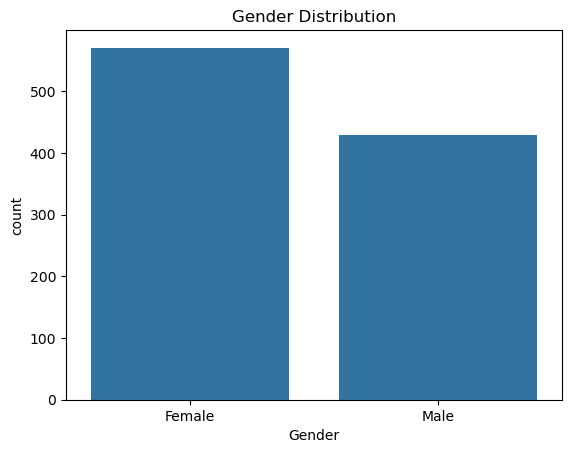

In [29]:
#  Gender distribution
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.show()


<Axes: >

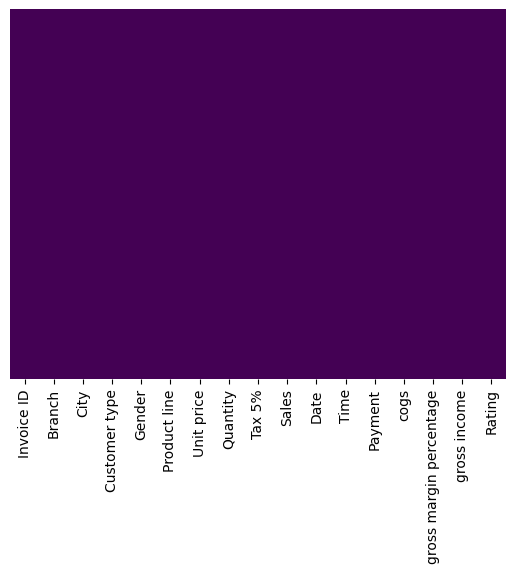

In [33]:
# Create heatmap of missing values

sns.heatmap(df.isnull(), 
            cbar=False,       # hide the color bar
            cmap='viridis',   # color palette
            yticklabels=False)

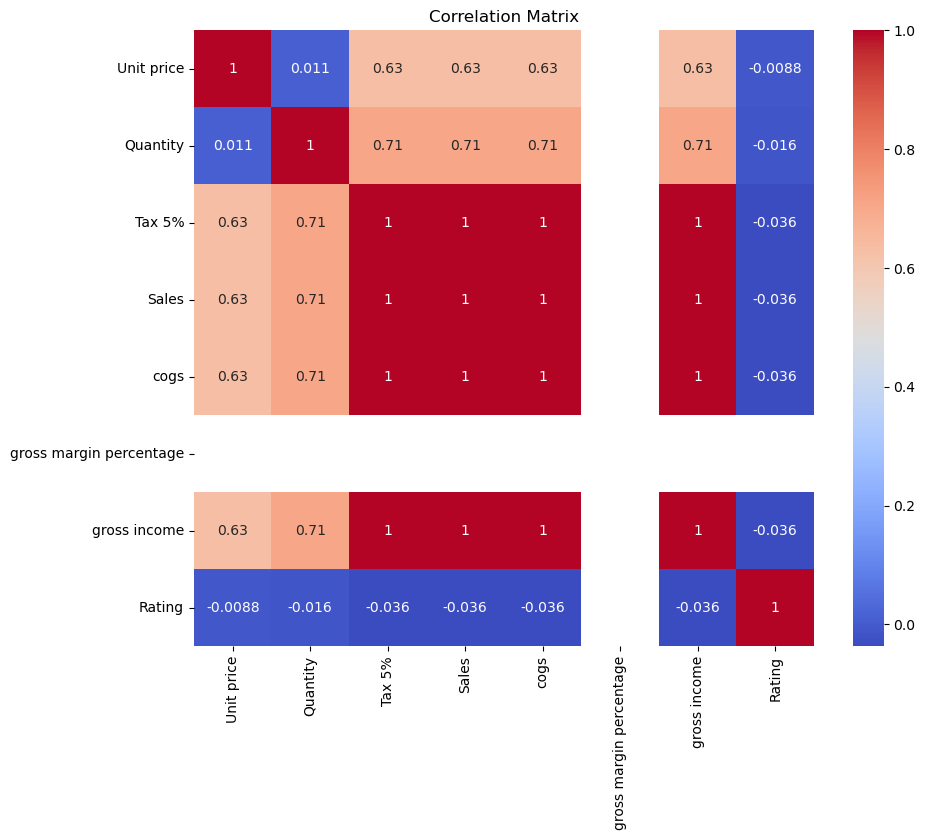

In [139]:
#  Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [155]:
## Red shades = Strong positive relationship ,Blue shades = Weak or negative relationship
# Quantity & Sales = 0.71 :More quantity sold leads to higher sales. Unit Price & Sales = 0.63 :Higher-priced items usually lead to higher sales value.
#Rating & others : near 0 or negative
# Rating does not have a strong relationship with sales, income, or price.

4.Univeriate Analysis

<Axes: ylabel='Count'>

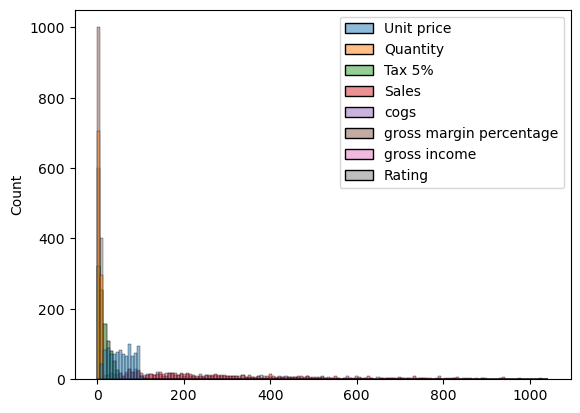

In [80]:
sns.histplot(df) #for numerical 

In [ ]:
## most values are clustered on the left, showing right-skewed data.

<Axes: >

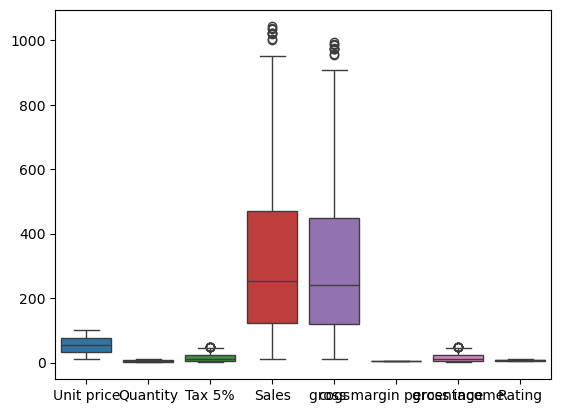

In [63]:
sns.boxplot(df)  ## for numerical 

In [ ]:
## Columns like Sales and gross income have noticeable outliers at higher values.
## The height of the box shows the interquartile range (IQR), while dots indicate extreme values.

<Axes: >

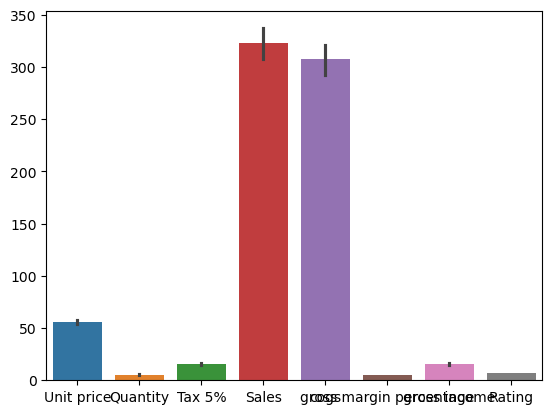

In [92]:
sns.barplot(df)  ##for categorical 

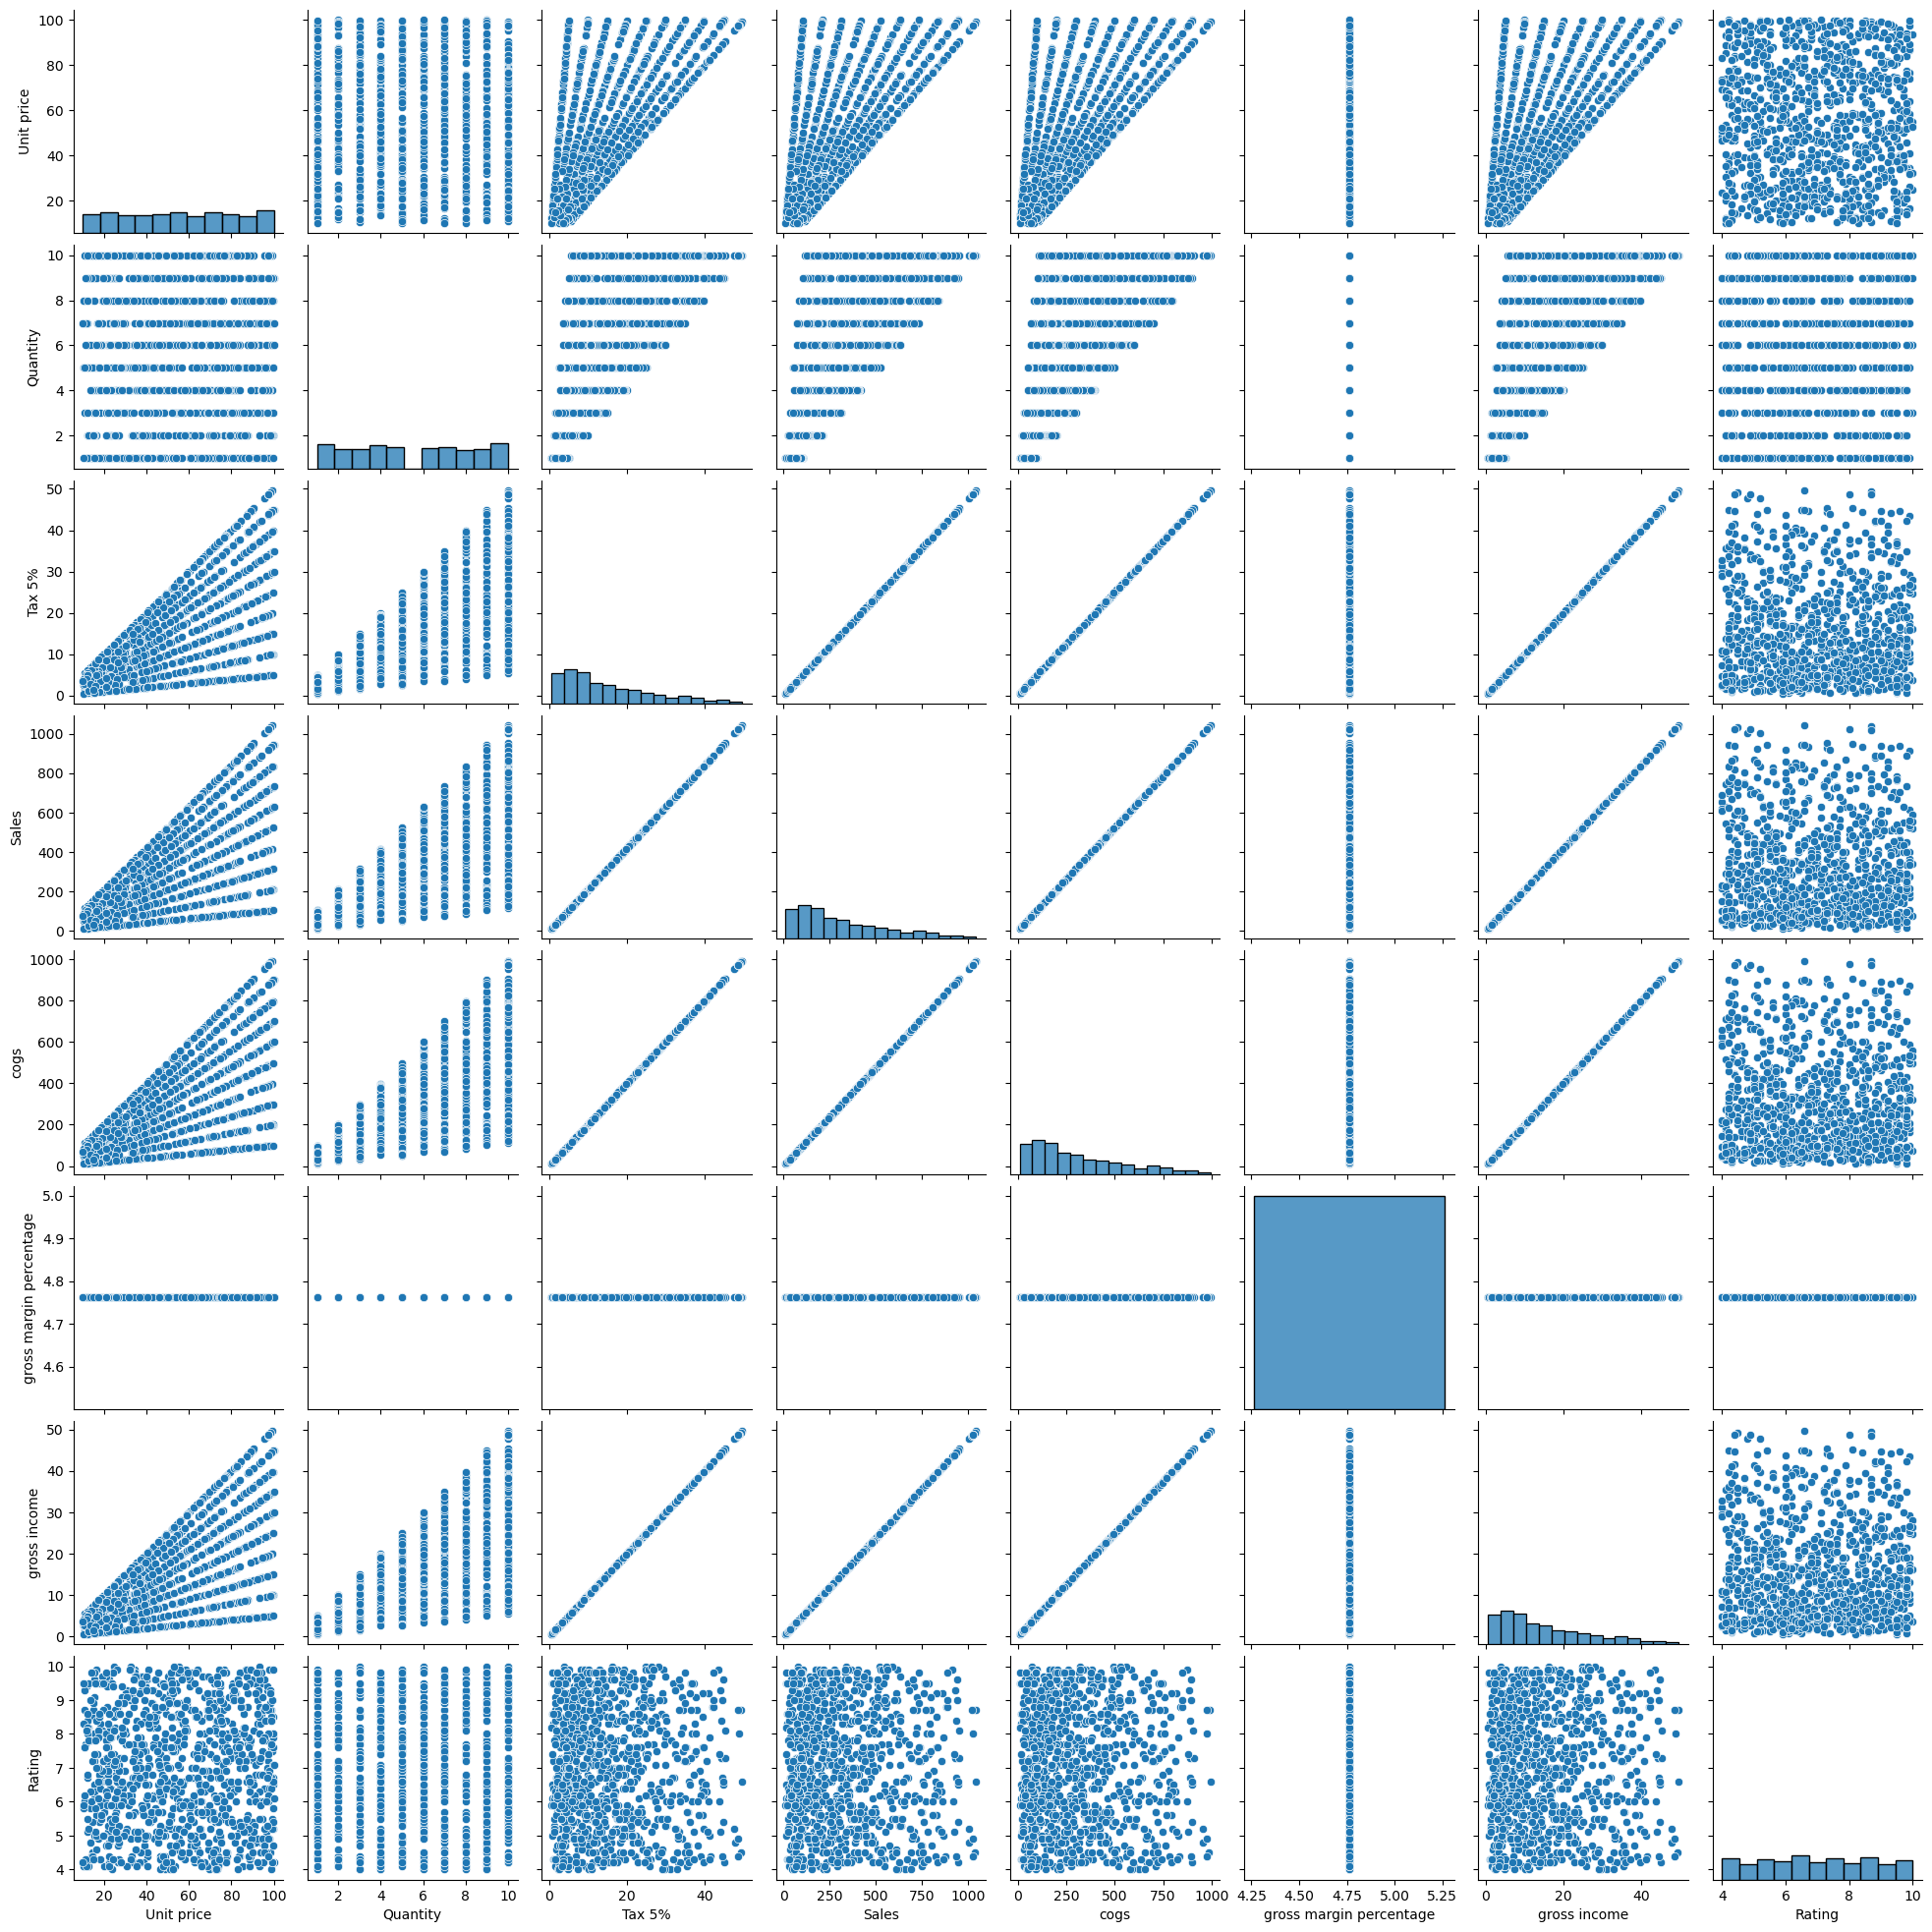

In [75]:
sns.pairplot(df)

<Axes: ylabel='count'>

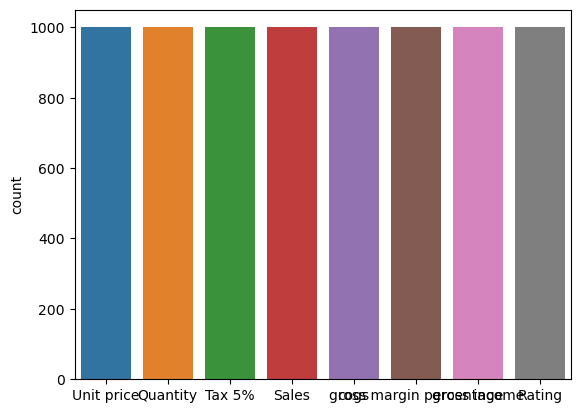

In [78]:
sns.countplot(df)  

5. Bivariate and Multivariate Analysis

<Axes: >

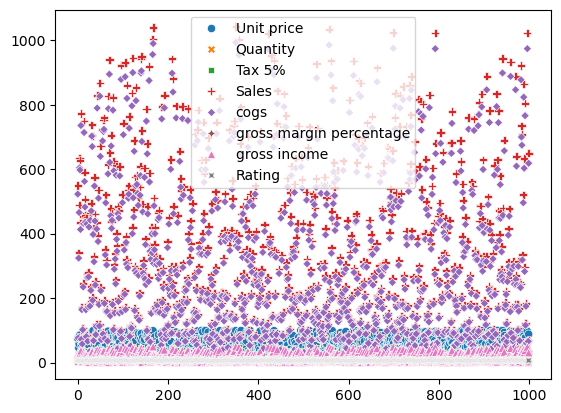

In [97]:
sns.scatterplot(df)

In [ ]:
## It looks cluttered because too many variables are plotted togethe.

##This plot gives a rough idea of value ranges and spreads but lacks clarity for deep insights.

In [143]:
df.groupby('City')['Sales'].sum()
## Total sales by city

City
Mandalay     106197.6720
Naypyitaw    110568.7065
Yangon       106200.3705
Name: Sales, dtype: float64

In [145]:
df.groupby('Date')['Sales'].sum()
## total sales by date

Date
1/1/2019     4745.1810
1/10/2019    3560.9490
1/11/2019    2114.9625
1/12/2019    5184.7635
1/13/2019    2451.2040
               ...    
3/5/2019     6230.8785
3/6/2019     3092.5965
3/7/2019     1438.2585
3/8/2019     3125.3880
3/9/2019     7474.0470
Name: Sales, Length: 89, dtype: float64

In [147]:
df.groupby('Gender')['Sales'].sum()
##sales by gender

Gender
Female    194671.8375
Male      128294.9115
Name: Sales, dtype: float64

In [149]:
df['Product line'].value_counts()
# Or using groupby:
df.groupby('Product line')['Invoice ID'].count()
## Count of Sales by Product Line

Product line
Electronic accessories    170
Fashion accessories       178
Food and beverages        174
Health and beauty         152
Home and lifestyle        160
Sports and travel         166
Name: Invoice ID, dtype: int64

6. Outlier Detection

<Axes: >

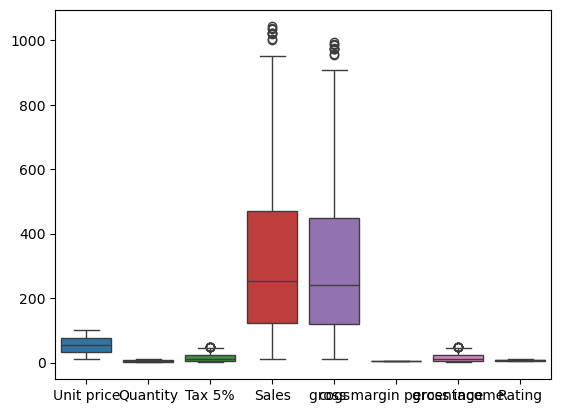

In [112]:
sns.boxplot(df)

7.Data Discribution 

In [151]:
df['Sales'].skew()


0.8925698049581418

In [153]:

df['Sales_log'] = np.log1p(df['Sales']) 

<Axes: ylabel='Density'>

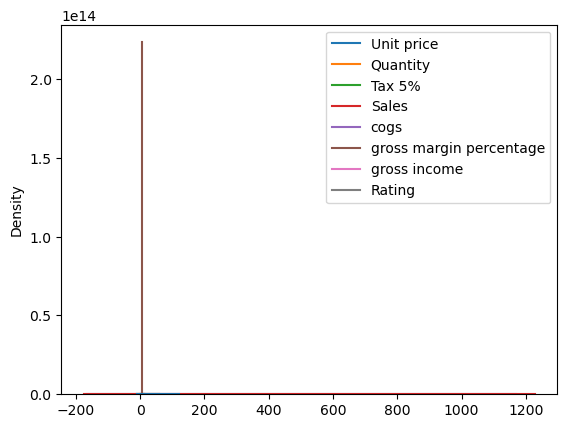

In [129]:
sns.kdeplot(df)